In [1]:
pip install pandas openpyxl


In [2]:
import pandas as pd


excel_file = '/content/drive/MyDrive/Colab Notebooks/datos para encargo 4.xlsx'


df = pd.read_excel(excel_file)


csv_file = 'datos para encargo 4.csv'
df.to_csv(csv_file, index=False)

print("Archivo convertido y guardado como {csv_file}")


Archivo convertido y guardado como {csv_file}


In [37]:

import pandas as pd


data = pd.read_csv('datos para encargo 4.csv')


print(data.head())



     Incident_ID  Year  Victims_Killed  Victims_Wounded
0  20240326GATUA  2024               0                0
1  20240326MOCHC  2024               0                0
2  20240326NJWEN  2024               0                2
3  20240325HIWAW  2024               0                1
4  20240321NJMAN  2024               1                0


In [17]:
import pandas as pd

# Cargar los datos desde el archivo CSV
data = pd.read_csv('datos para encargo 4.csv')

# Verificar que los datos se cargaron correctamente (opcional)
print(data.head())

# Agrupar los datos por año y realizar los cálculos
# Use the actual column names from your DataFrame
summary = data.groupby('Year').agg(
    incidents=('Incident_ID', 'count'),
    total_victims_killed=('Victims_Killed', 'sum'),
    total_victims_wounded=('Victims_Wounded', 'sum')
).reset_index()

# Mostrar el resumen
print(summary)

     Incident_ID  Year  Victims_Killed  Victims_Wounded
0  20240326GATUA  2024               0                0
1  20240326MOCHC  2024               0                0
2  20240326NJWEN  2024               0                2
3  20240325HIWAW  2024               0                1
4  20240321NJMAN  2024               1                0
    Year  incidents  total_victims_killed  total_victims_wounded
0   1966          9                     6                      9
1   1967          7                     3                      5
2   1968         10                     3                     10
3   1969          5                     3                      1
4   1970         20                     8                     24
5   1971         21                     7                     18
6   1972         18                     4                     22
7   1973         19                     6                     24
8   1974         16                    12                     18
9   1975      

In [18]:
# Guardar el resumen en un archivo CSV
summary.to_csv('resumen_incidentes.csv', index=False)


In [29]:
!pip install seaborn



   Year   Category  Count
0  1966  incidents      9
1  1967  incidents      7
2  1968  incidents     10
3  1969  incidents      5
4  1970  incidents     20


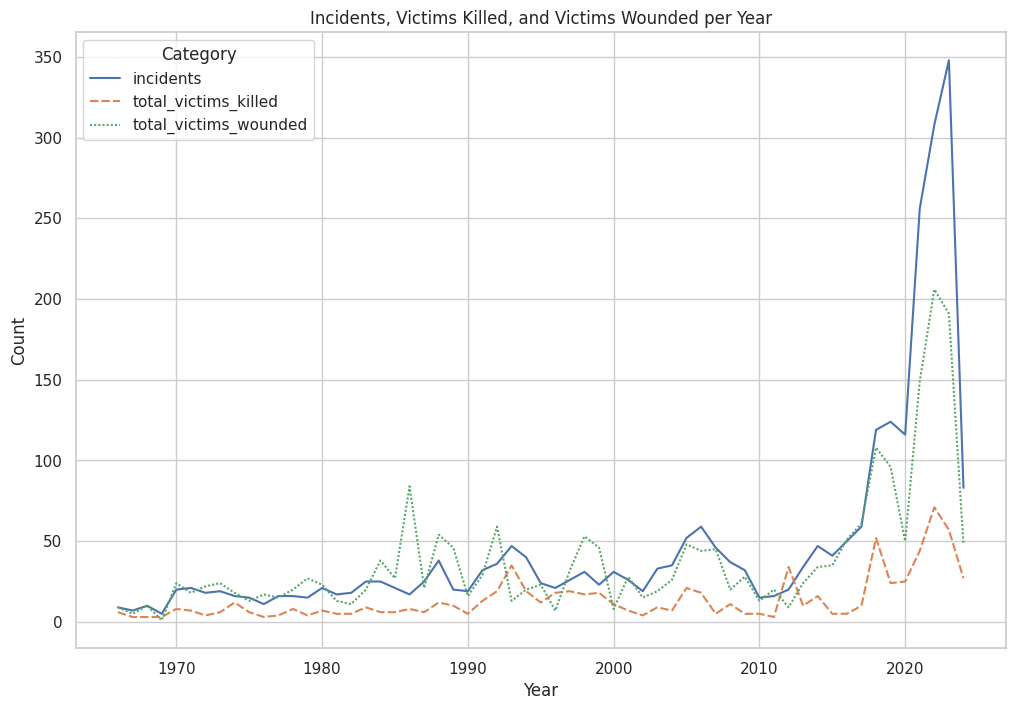

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
summary = pd.read_csv('resumen_incidentes.csv')


# Reformatear los datos para que seaborn pueda manejar múltiples series
summary_melted = pd.melt(summary, id_vars=['Year'],
                         value_vars=['incidents', 'total_victims_killed', 'total_victims_wounded'],
                         var_name='Category', value_name='Count')

# Verificar los datos reformateados (opcional)
print(summary_melted.head())

# Crear el gráfico de dispersión combinado
plt.figure(figsize=(12, 8))
sns.lineplot(data=summary_melted, x='Year', y='Count', hue='Category', style='Category')

# Ajustar el título y las etiquetas
plt.title('Incidents, Victims Killed, and Victims Wounded per Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()
